<a href="https://colab.research.google.com/github/shivansh2310/Finance-Stuff/blob/main/Pair_Trading_Strategy_on_Nifty50_and_S%26P_500_log_returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [29]:
# Download data for Nifty50 and S&P 500
nifty = yf.download('^NSEI', start='2020-01-01', end='2023-01-01', progress=False)
sp500 = yf.download('^GSPC', start='2020-01-01', end='2022-01-01', progress=False)

In [30]:
# Calculate log returns
nifty['log_returns'] = np.log(nifty['Adj Close'] / nifty['Adj Close'].shift(1))
sp500['log_returns'] = np.log(sp500['Adj Close'] / sp500['Adj Close'].shift(1))

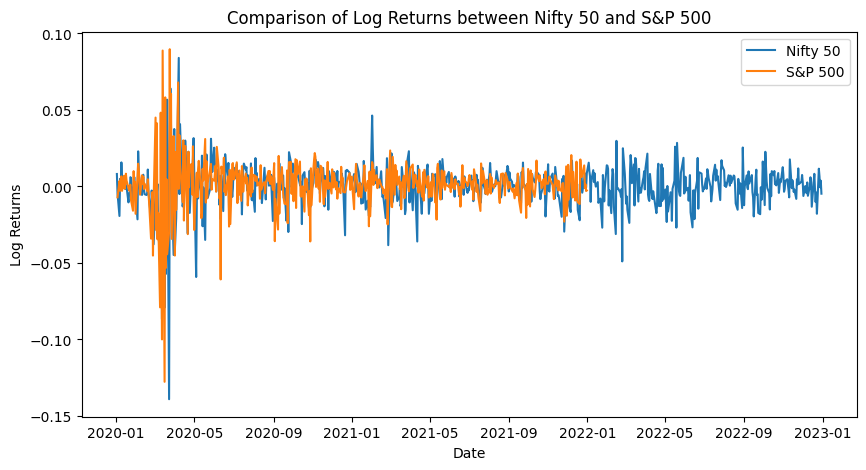

In [31]:
# Plot the log returns in 2D
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(nifty['log_returns'], label="Nifty 50")
ax.plot(sp500['log_returns'], label="S&P 500")
ax.legend()
ax.set_xlabel("Date")
ax.set_ylabel("Log Returns")
ax.set_title("Comparison of Log Returns between Nifty 50 and S&P 500")
plt.show()

In [32]:
# Merge the two dataframes based on date
df = pd.merge(nifty[['log_returns']], sp500[['log_returns']], left_index=True, right_index=True)

# Calculate the spread between the log returns
df['spread'] = df['log_returns_x'] - df['log_returns_y']

In [41]:
# Calculate mean and standard deviation of the spread
mean_spread = df['spread'].mean()
std_spread = df['spread'].std()

print(mean_spread)
print(std_spread)

0.00021421377972147038
0.017822172248644713


In [42]:
# Define entry and exit signals
df['signal'] = np.where(df['spread'] > mean_spread + std_spread, -1, np.nan)
df['signal'] = np.where(df['spread'] < mean_spread - std_spread, 1, df['signal'])

# Forward fill the signal to get the holding period
df['signal'] = df['signal'].ffill()

# Calculate the portfolio returns
df['portfolio_returns'] = df['signal'] * df['spread'].shift(1)

In [44]:
df['portfolio_returns']

Date
2020-01-02         NaN
2020-01-03         NaN
2020-01-06    0.002552
2020-01-07   -0.022818
2020-01-08    0.007789
                ...   
2021-12-27    0.000681
2021-12-28   -0.008904
2021-12-29    0.009577
2021-12-30   -0.002542
2021-12-31    0.002433
Name: portfolio_returns, Length: 484, dtype: float64

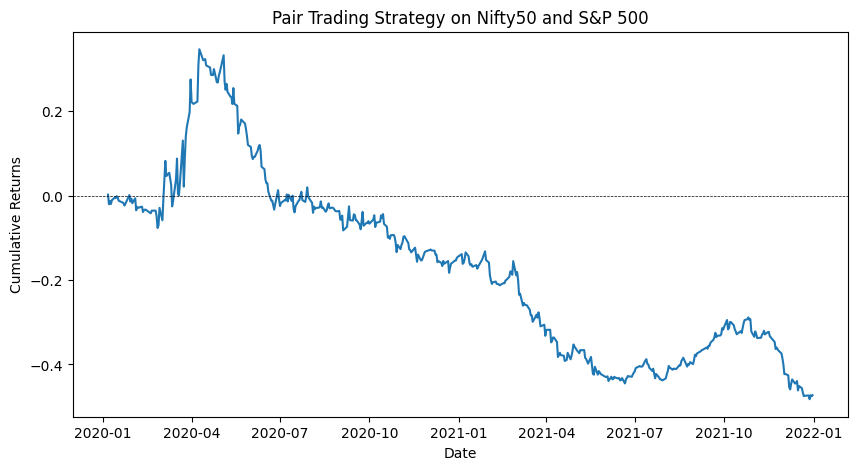

In [36]:
# Plot the portfolio returns
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df['portfolio_returns'].cumsum())
ax.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Returns')
ax.set_title('Pair Trading Strategy on Nifty50 and S&P 500')
plt.show()